In [17]:
import tweepy 
from tweepy.auth import OAuthHandler 

In [18]:
from credentials import *    # This will allow us to use the keys as variables

# API's setup:
def twitter_setup():
    
    # Authentication and access using keys:
    auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
    auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)

    # Return API with authentication:
    api = tweepy.API(auth)
    return api

    # We create an extractor object:
extractor = twitter_setup()

# We create a tweet list as follows:
tweets = extractor.user_timeline(screen_name="realDonaldTrump", count=200)
print("Number of tweets extracted: {}.\n".format(len(tweets)))

# We print the most recent 5 tweets:
print("5 recent tweets:\n")
for tweet in tweets[:5]:
    print(tweet.text)
    print()



Number of tweets extracted: 200.

5 recent tweets:

...haven’t even started yet! The U.S. has very little to give, because it has given so much over the years. China has much to give!

...We have not seen China’s demands yet, which should be few in that previous U.S. Administrations have done so poo… https://t.co/vOBV6ibkGk

The Washington Post and CNN have typically written false stories about our trade negotiations with China. Nothing h… https://t.co/pTIy1Tm9k0

Congratulations to Deb Fischer. The people of Nebraska have seen what a great job she is doing - and it showed up at the ballot box! #MAGA

Congratulations to Lou Barletta of Pennsylvania. He will be a great Senator and will represent his people well - li… https://t.co/972DSl4ox1



In [19]:
import pandas as pd     # To handle data
import numpy as np      # For number computing

# For plotting and visualization:
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
data = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweets'])

# We display the first 10 elements of the dataframe:
display(data.head(10))

# We print info from the first tweet:
print(tweets[0].id)
print(tweets[0].created_at)
print(tweets[0].source)
print(tweets[0].favorite_count)
print(tweets[0].retweet_count)
print(tweets[0].geo)
print(tweets[0].coordinates)
print(tweets[0].entities)

data['len']  = np.array([len(tweet.text) for tweet in tweets])
data['ID']   = np.array([tweet.id for tweet in tweets])
data['Date'] = np.array([tweet.created_at for tweet in tweets])
data['Source'] = np.array([tweet.source for tweet in tweets])
data['Likes']  = np.array([tweet.favorite_count for tweet in tweets])
data['RTs']    = np.array([tweet.retweet_count for tweet in tweets])
display(data.head(10))


mean = np.mean(data['len'])

print("The lenght's average in tweets: {}".format(mean))

# We extract the tweet with more FAVs and more RTs:

fav_max = np.max(data['Likes'])
rt_max  = np.max(data['RTs'])

fav = data[data.Likes == fav_max].index[0]
rt  = data[data.RTs == rt_max].index[0]

# Max FAVs:
print("The tweet with more likes is: \n{}".format(data['Tweets'][fav]))
print("Number of likes: {}".format(fav_max))
print("{} characters.\n".format(data['len'][fav]))

# Max RTs:
print("The tweet with more retweets is: \n{}".format(data['Tweets'][rt]))
print("Number of retweets: {}".format(rt_max))
print("{} characters.\n".format(data['len'][rt]))


,Tweets
0,...haven’t even started yet! The U.S. has very...
1,"...We have not seen China’s demands yet, which..."
2,The Washington Post and CNN have typically wri...
3,Congratulations to Deb Fischer. The people of ...
4,Congratulations to Lou Barletta of Pennsylvani...
5,Thank you to the Washington Examiner and @Cort...
6,#PeaceOfficersMemorialDay https://t.co/agxulpPyag
7,Today is one of the most important and solemn ...
8,Nebraska - make sure you get out to the polls ...
9,"Can you believe that with all of the made up, ..."


996739376028835840
2018-05-16 13:09:20
Twitter for iPhone
14815
3369
None
None
{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': []}


,Tweets,len,ID,Date,Source,Likes,RTs
0,...haven’t even started yet! The U.S. has very...,131,996739376028835840,2018-05-16 13:09:20,Twitter for iPhone,14815,3369
1,"...We have not seen China’s demands yet, which...",140,996739374619426816,2018-05-16 13:09:20,Twitter for iPhone,13520,3115
2,The Washington Post and CNN have typically wri...,140,996739372723638272,2018-05-16 13:09:19,Twitter for iPhone,16696,4326
3,Congratulations to Deb Fischer. The people of ...,138,996728397362540545,2018-05-16 12:25:42,Twitter for iPhone,29994,6068
4,Congratulations to Lou Barletta of Pennsylvani...,140,996723907867676673,2018-05-16 12:07:52,Twitter for iPhone,40344,8432
5,Thank you to the Washington Examiner and @Cort...,112,996487798759854082,2018-05-15 20:29:39,Twitter for iPhone,38535,9738
6,#PeaceOfficersMemorialDay https://t.co/agxulpPyag,49,996464466702274561,2018-05-15 18:56:56,Twitter for iPhone,39182,9162
7,Today is one of the most important and solemn ...,140,996460197005717504,2018-05-15 18:39:58,Twitter for iPhone,70850,16492
8,Nebraska - make sure you get out to the polls ...,101,996442654568341505,2018-05-15 17:30:16,Twitter for iPhone,39772,11057
9,"Can you believe that with all of the made up, ...",138,996391840860471296,2018-05-15 14:08:21,Twitter for iPhone,126908,29453


The lenght's average in tweets: 126.49
The tweet with more likes is: 
Thank you Kanye, very cool! https://t.co/vRIC87M21X
Number of likes: 362049
51 characters.

The tweet with more retweets is: 
Thank you Kanye, very cool! https://t.co/vRIC87M21X
Number of retweets: 108344
51 characters.



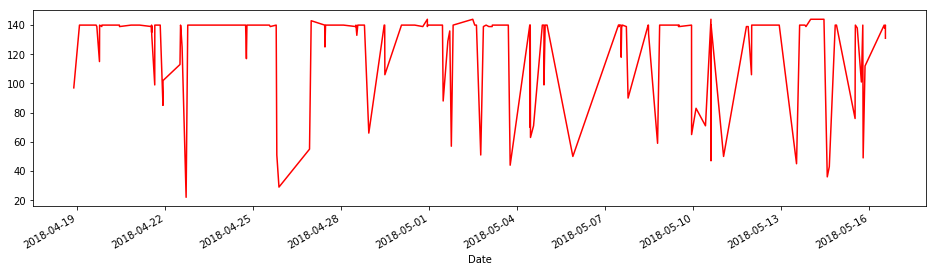

In [21]:
tlen = pd.Series(data=data['len'].values, index=data['Date'])
tfav = pd.Series(data=data['Likes'].values, index=data['Date'])
tret = pd.Series(data=data['RTs'].values, index=data['Date'])
tlen.plot(figsize=(16,4), color='r');

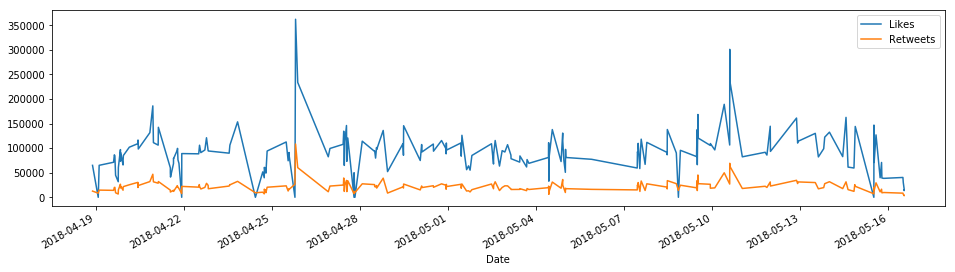

In [22]:
tfav.plot(figsize=(16,4), label="Likes", legend=True)
tret.plot(figsize=(16,4), label="Retweets", legend=True);

In [23]:
sources = []
for source in data['Source']:
    if source not in sources:
        sources.append(source)

# We print sources list:
print("Creation of content sources:")
for source in sources:
    print("* {}".format(source))

Creation of content sources:
* Twitter for iPhone
* Twitter for iPad
* Media Studio


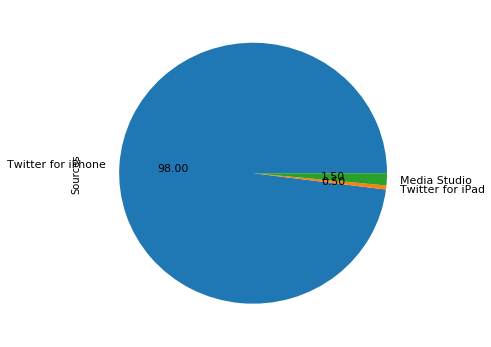

In [24]:
# We create a numpy vector mapped to labels:
percent = np.zeros(len(sources))

for source in data['Source']:
    for index in range(len(sources)):
        if source == sources[index]:
            percent[index] += 1
            pass

percent /= 100

# Pie chart:
pie_chart = pd.Series(percent, index=sources, name='Sources')
pie_chart.plot.pie(fontsize=11, autopct='%.2f', figsize=(6, 6));

In [26]:
from textblob import TextBlob
import re

def clean_tweet(tweet):
    '''
    Utility function to clean the text in a tweet by removing 
    links and special characters using regex.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

def analize_sentiment(tweet):
    '''
    Utility function to classify the polarity of a tweet
    using textblob.
    '''
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1
    
    # We create a column with the result of the analysis:
data['SA'] = np.array([ analize_sentiment(tweet) for tweet in data['Tweets'] ])

# We display the updated dataframe with the new column:
display(data.head(10))

,Tweets,len,ID,Date,Source,Likes,RTs,SA
0,...haven’t even started yet! The U.S. has very...,131,996739376028835840,2018-05-16 13:09:20,Twitter for iPhone,14815,3369,1
1,"...We have not seen China’s demands yet, which...",140,996739374619426816,2018-05-16 13:09:20,Twitter for iPhone,13520,3115,-1
2,The Washington Post and CNN have typically wri...,140,996739372723638272,2018-05-16 13:09:19,Twitter for iPhone,16696,4326,-1
3,Congratulations to Deb Fischer. The people of ...,138,996728397362540545,2018-05-16 12:25:42,Twitter for iPhone,29994,6068,1
4,Congratulations to Lou Barletta of Pennsylvani...,140,996723907867676673,2018-05-16 12:07:52,Twitter for iPhone,40344,8432,1
5,Thank you to the Washington Examiner and @Cort...,112,996487798759854082,2018-05-15 20:29:39,Twitter for iPhone,38535,9738,1
6,#PeaceOfficersMemorialDay https://t.co/agxulpPyag,49,996464466702274561,2018-05-15 18:56:56,Twitter for iPhone,39182,9162,0
7,Today is one of the most important and solemn ...,140,996460197005717504,2018-05-15 18:39:58,Twitter for iPhone,70850,16492,1
8,Nebraska - make sure you get out to the polls ...,101,996442654568341505,2018-05-15 17:30:16,Twitter for iPhone,39772,11057,1
9,"Can you believe that with all of the made up, ...",138,996391840860471296,2018-05-15 14:08:21,Twitter for iPhone,126908,29453,-1


In [27]:
pos_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] > 0]
neu_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] == 0]
neg_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] < 0]

In [28]:
print("Percentage of positive tweets: {}%".format(len(pos_tweets)*100/len(data['Tweets'])))
print("Percentage of neutral tweets: {}%".format(len(neu_tweets)*100/len(data['Tweets'])))
print("Percentage de negative tweets: {}%".format(len(neg_tweets)*100/len(data['Tweets'])))

Percentage of positive tweets: 52.5%
Percentage of neutral tweets: 24.5%
Percentage de negative tweets: 23.0%
